# ARIMA (AutoRegressive Integrated Moving Average) – A Complete Guide

ARIMA is one of the most popular time series forecasting techniques. It is useful for predicting future values based on past observations. ARIMA models are widely used in stock price prediction, demand forecasting, weather prediction, and other applications.

## 1. Understanding ARIMA Components

ARIMA stands for:

- **AutoRegressive (AR)**: Uses past values to predict future values.
- **Integrated (I)**: Differencing is used to make the time series stationary.
- **Moving Average (MA)**: Uses past forecast errors to improve predictions.

An ARIMA model is represented as **ARIMA(p, d, q)**:

- **p (AR order)**: Number of lagged observations used for forecasting.
- **d (Differencing order)**: Number of times the data is differenced to make it stationary.
- **q (MA order)**: Number of past error terms used in the model.

In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\Harsh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Harsh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\Harsh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [10]:
pip install seaborn

You should consider upgrading via the 'c:\Users\Harsh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [12]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Harsh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [14]:
pip install sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'c:\Users\Harsh\AppData\Local\Programs\Python\Python310\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Harsh\\AppData\\Local\\Temp\\pip-install-ce00_2au\\sklearn_168e7f3b1d204b9aba13e4b802e35277\\setup.py'"'"'; __file__='"'"'C:\\Users\\Harsh\\AppData\\Local\\Temp\\pip-install-ce00_2au\\sklearn_168e7f3b1d204b9aba13e4b802e35277\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Harsh\AppData\Local\Temp\pip-pip-egg-info-16xb8qif'
         cwd: C:\Users\Harsh\AppData\Local\Temp\pip-install-ce00_2au\sklearn_168e7f3b1d204b9aba13e4b802e35277\
    Complete output (15 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  

In [15]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [16]:
# Load sample dataset (e.g., Air Passenger dataset)
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', index_col='Month', parse_dates=True)
df.index.freq = 'MS' # Setting Monthly Start Frequency
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


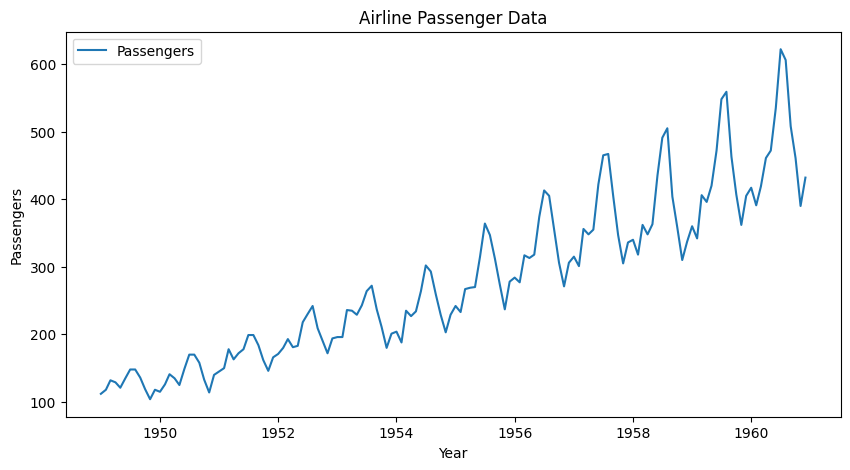

In [18]:
# Plot the time series data
plt.figure(figsize=(10,5)) 
plt.plot(df, label='Passengers')
plt.title('Airline Passenger Data')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [19]:
# Step 3: **Check for Stationarity**
# A time series should be stationary (constant mean and variance) before applying ARIMA. We use the Augmented Dickey-Fuller (ADF) test:

In [20]:
# ADF Test Function
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value:{result[1]}')
    if result[1] < 0.05:
        print("Series is Stationary")
    else:
        print("Series in Non-Stationary")
        
# Run ADF Test
adf_test(df['Passengers'])


ADF Statistic: 0.8153688792060463
p-value:0.991880243437641
Series in Non-Stationary


# If the series is non-stationary (p-value > 0.05), apply differencing.

# Differencing to Make Data Stationary

In [26]:
df_diff = df.diff().dropna()
adf_test(df_diff['Passengers'])

ADF Statistic: -2.8292668241699923
p-value:0.054213290283826474
Series in Non-Stationary


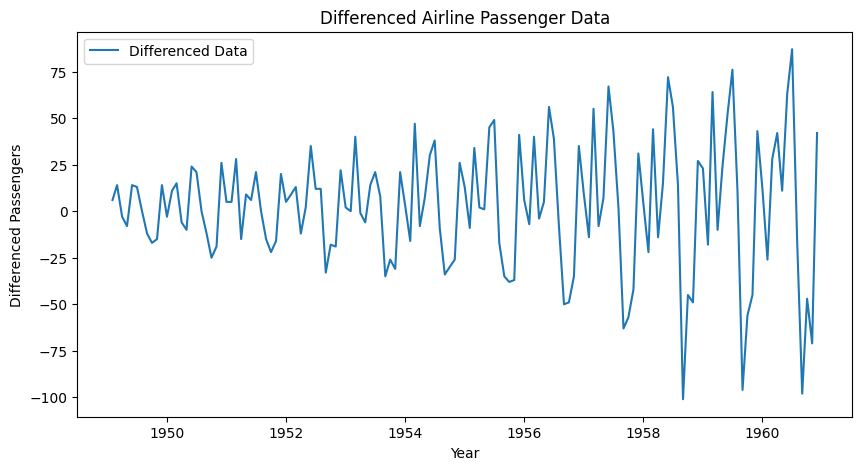

In [23]:
# Plot the differenced data
plt.figure(figsize=(10,5))
plt.plot(df_diff, label='Differenced Data')
plt.title('Differenced Airline Passenger Data')
plt.xlabel('Year')
plt.ylabel('Differenced Passengers')
plt.legend()
plt.show()

# Keep differencing until ADF test p-value < 0.05.
# The number of differences applied is d (integration order).

In [28]:
df_diff2 = df_diff.diff().dropna()  # Second-order differencing

# Run ADF Test again
adf_test(df_diff2['Passengers'])

ADF Statistic: -16.384231542468516
p-value:2.7328918500141235e-29
Series is Stationary


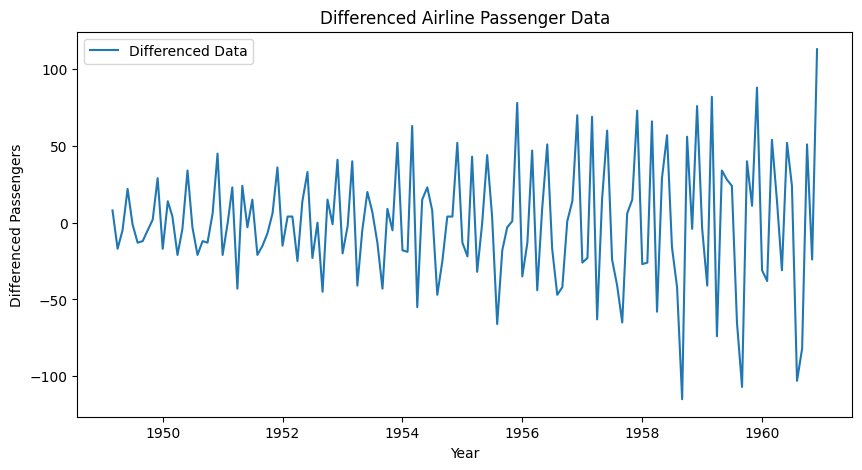

In [29]:
# Plot the differenced data
plt.figure(figsize=(10,5))
plt.plot(df_diff2, label='Differenced Data')
plt.title('Differenced Airline Passenger Data')
plt.xlabel('Year')
plt.ylabel('Differenced Passengers')
plt.legend()
plt.show()

# How to Choose 'd' in ARIMA(p, d, q)?
# Start with d=0 (no differencing). If the series is stationary, use ARIMA(p, 0, q).
# If non-stationary, use d=1 (first-order differencing).
# If still non-stationary, use d=2 (second-order differencing).
# Avoid excessive differencing (usually, d ≤ 2 is sufficient).
### Heuristic Rule:

# If ACF plot shows gradual decline, the series needs differencing.
# If ACF plot shows sharp cutoff, the series is stationary.


## 6. Summary

| **Concept**                         | **Explanation** |
|---------------------------------    |----------------|
| **Stationarity**                    | A time series is stationary if it has a constant mean, variance, and no trend or seasonality. |
| **ADF Test**                        | Used to check if a time series is stationary. If **p-value ≤ 0.05**, the series is stationary. |
| **First-Order Differencing (d=1)**  | \( Y'_t = Y_t - Y_{t-1} \) (removes trend). Apply if the series is non-stationary. |
| **Second-Order Differencing (d=2)** | \( Y''_t = Y'_t - Y'_{t-1} \) (removes more complex trends). Apply if the first differencing is insufficient. |
| **Choosing 'd' in ARIMA(p,d,q)**    | Keep differencing until the ADF test confirms stationarity (p-value < 0.05). Typically,**d ≤ 2** is sufficient. |
| **Check ACF Plot**                  | If ACF shows **gradual decline**, apply differencing. If ACF shows **sharp cutoff**, the series is stationary. |
